
# Robust linear estimator fitting

Here a sine function is fit with a polynomial of order 3, for values
close to zero.

Robust fitting is demoed in different situations:

- No measurement errors, only modelling errors (fitting a sine with a
  polynomial)

- Measurement errors in X

- Measurement errors in y

The median absolute deviation to non corrupt new data is used to judge
the quality of the prediction.

What we can see that:

- RANSAC is good for strong outliers in the y direction

- TheilSen is good for small outliers, both in direction X and y, but has
  a break point above which it performs worse than OLS.

- The scores of HuberRegressor may not be compared directly to both TheilSen
  and RANSAC because it does not attempt to completely filter the outliers
  but lessen their effect.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import (
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)

X = np.random.normal(size=400)
y = np.sin(X)
# Make sure that it X is 2D
X = X[:, np.newaxis]

X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

y_errors = y.copy()
y_errors[::3] = 3

X_errors = X.copy()
X_errors[::3] = 3

y_errors_large = y.copy()
y_errors_large[::3] = 10

X_errors_large = X.copy()
X_errors_large[::3] = 10

estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
    ("HuberRegressor", HuberRegressor()),
]


### Theil-Sen Regressor

#### Concept

Theil-Sen Estimator is a robust method for linear regression that is less sensitive to outliers compared to Ordinary Least Squares (OLS). It computes the median of the slopes of all possible pairs of points in the dataset, providing a robust estimate of the linear relationship.

#### Mathematical Background

Given a dataset with $\  n $ points $\ (x_i, y_i)$, Theil-Sen regression estimates the slope ($\ \beta$) by computing the median of the slopes between all pairs of points:

$\
\beta = \text{median} \left( \frac{y_j - y_i}{x_j - x_i} \right) \quad \text{for} \quad i < j
$

The intercept ($\ \alpha $) is then computed as the median of the differences between the observed $\  y $ values and the fitted line:

$\
\alpha = \text{median} \left( y_i - \beta x_i \right)
$

#### Advantages

- **Robust to Outliers**: Theil-Sen is less sensitive to outliers, making it suitable for datasets with noisy data.
- **Non-parametric**: Does not assume any particular distribution for the errors.

#### Disadvantages

- **Computationally Intensive**: The computation of all pairwise slopes can be slow for large datasets.
- **Less Efficient**: In the absence of outliers, OLS is more efficient and has smaller variance.

#### Main Arguments

- **random_state**: Controls the randomness of the estimator. Useful for reproducibility.

```python
from sklearn.linear_model import TheilSenRegressor

model = TheilSenRegressor(random_state=42)


### RANSAC Regressor

#### Concept

RANSAC (RANdom SAmple Consensus) is an iterative method used to estimate the parameters of a mathematical model from a dataset containing outliers. It is a robust regression technique that works by repeatedly selecting a random subset of the data and fitting a model to this subset. The key idea is to identify inliers that are consistent with the model while ignoring outliers.

#### Mathematical Background

RANSAC operates through an iterative process involving four main steps:

1. **Random Sampling**:
   - Randomly select a subset of the original data points (minimum number of points required to fit the model).
   - Fit the model to this subset to estimate the parameters.

2. **Consensus Set**:
   - Use the estimated model to determine the consensus set, which consists of all data points that fit the model within a specified tolerance.
   - Specifically, for each data point $(x_i, y_i) $ , compute the residual $ r_i  $ :
     $\
     r_i = |y_i - (\beta x_i + \alpha)|
     $
   - If $ r_i \leq \text{residual\_threshold}  $ , the point is considered an inlier and is included in the consensus set.

3. **Model Refinement**:
   - If the number of inliers in the consensus set is large enough (defined by a threshold), re-estimate the model parameters using all points in the consensus set.

4. **Iteration**:
   - Repeat the above steps for a predefined number of iterations or until a satisfactory model is found.
   - The final model is chosen based on the largest consensus set obtained.

The final estimates of the slope ($\beta $ ) and intercept ($\alpha $ ) are derived from the model that has the largest consensus set.

#### Advantages

- **Robust to Outliers**: Effectively identifies


### Huber Regressor

#### Concept

The Huber Regressor is a linear regression model that is robust to outliers in the dataset. It uses the Huber loss function, which is a combination of the squared loss for small errors and the absolute loss for large errors. This approach is less sensitive to outliers compared to OLS.

#### Mathematical Background

The Huber loss function is defined as:

$\
L_\delta(a) = 
\begin{cases} 
\frac{1}{2} a^2 & \text{for } |a| \leq \delta \\
\delta (|a| - \frac{1}{2} \delta) & \text{for } |a| > \delta
\end{cases}
$

where $\  a = y - \hat{y} $  is the residual (error) and $\  \delta $  is the threshold parameter.

The regression coefficients ($\ \beta$ ) are estimated by minimizing the Huber loss function:

$\
\min_{\beta} \sum_{i=1}^{n} L_\delta(y_i - \vec{x}_i^T \beta)
$

#### Advantages

- **Robust to Outliers**: Combines the benefits of squared loss (efficient for small errors) and absolute loss (robust for large errors).
- **Smooth Optimization**: Provides a smooth approximation to the absolute loss, making it easier to optimize.

#### Disadvantages

- **Choice of $\ \delta$ **: The performance of the model can be sensitive to the choice of the threshold parameter $\ \delta$ .

#### Main Arguments

- **epsilon**: The threshold parameter that determines the point where the loss function changes from a quadratic to linear.
- **max_iter**: Maximum number of iterations for optimization.
- **alpha**: Regularization strength.

```python
from sklearn.linear_model import HuberRegressor

model = HuberRegressor()
diff
Copier le code



### Comparison of Robust Regression Techniques

#### Ordinary Least Squares (OLS)

- **Concept**: Minimizes the sum of squared residuals.
- **Advantages**: Simple, efficient for large datasets, unbiased estimators.
- **Disadvantages**: Highly sensitive to outliers.
- **Main Arguments**: None (basic linear regression).

#### Theil-Sen Regressor

- **Concept**: Computes the median of the slopes of all pairs of points.
- **Advantages**: Robust to outliers, non-parametric.
- **Disadvantages**: Computationally intensive for large datasets.
- **Main Arguments**: `random_state`.

#### RANSAC Regressor

- **Concept**: Iteratively fits the model to random subsets and selects the best consensus set.
- **Advantages**: Effectively handles outliers.
- **Disadvantages**: Computationally intensive, randomness can lead to different results.
- **Main Arguments**: `random_state`, `max_trials`, `min_samples`, `residual_threshold`.

#### Huber Regressor

- **Concept**: Uses the Huber loss function, combining squared and absolute loss.
- **Advantages**: Robust to outliers, smooth optimization.
- **Disadvantages**: Sensitive to the choice of the threshold parameter (\(\delta\)).
- **Main Arguments**: `epsilon`, `max_iter`, `alpha`.

### Summary

- **OLS** is suitable for clean datasets without outliers.
- **Theil-Sen** is robust to outliers but computationally intensive for large datasets.
- **RANSAC** is highly effective in the presence of outliers but requires careful tuning of parameters and can be computationally expensive.
- **Huber Regressor** balances robustness and efficiency, providing a smooth optimization approach but requires careful tuning of the threshold parameter.

Each method has its strengths and weaknesses, and the choice of method depends on the specific 

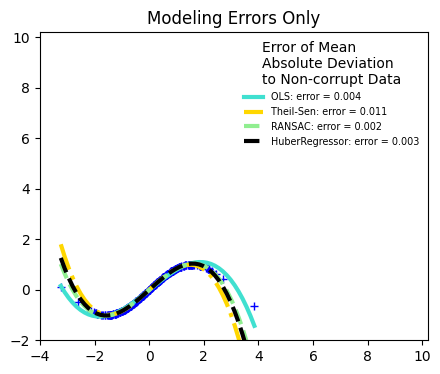

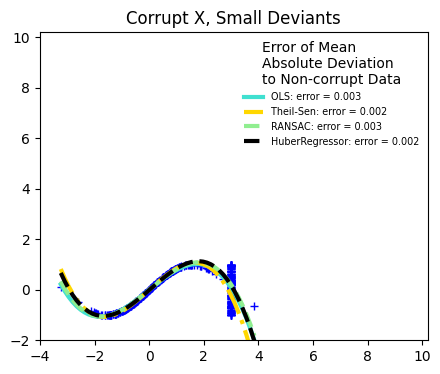

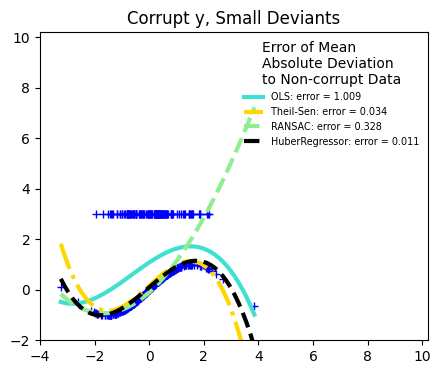

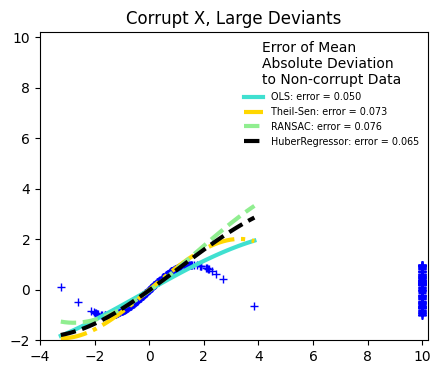

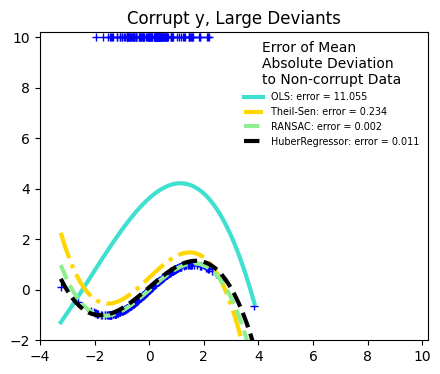

In [3]:
colors = {
    "OLS": "turquoise",
    "Theil-Sen": "gold",
    "RANSAC": "lightgreen",
    "HuberRegressor": "black",
}
linestyle = {"OLS": "-", "Theil-Sen": "-.", "RANSAC": "--", "HuberRegressor": "--"}
lw = 3

x_plot = np.linspace(X.min(), X.max())
for title, this_X, this_y in [
    ("Modeling Errors Only", X, y),
    ("Corrupt X, Small Deviants", X_errors, y),
    ("Corrupt y, Small Deviants", X, y_errors),
    ("Corrupt X, Large Deviants", X_errors_large, y),
    ("Corrupt y, Large Deviants", X, y_errors_large),
]:
    plt.figure(figsize=(5, 4))
    plt.plot(this_X[:, 0], this_y, "b+")

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label="%s: error = %.3f" % (name, mse),
        )

    legend_title = "Error of Mean\nAbsolute Deviation\nto Non-corrupt Data"
    legend = plt.legend(
        loc="upper right", frameon=False, title=legend_title, prop=dict(size="x-small")
    )
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

What we can see that:

RANSAC is good for strong outliers in the y direction

TheilSen is good for small outliers, both in direction X and y, but has a break point above which it performs worse than OLS.

The scores of HuberRegressor may not be compared directly to both TheilSen and RANSAC because it does not attempt to completely filter the outliers but lessen their effect.